# 순환 신경망 RNN
입력의 길이가 고정되어 있지 않은 $t$ 개의 데이터를 연속적으로 계산하기 위한 신경망
* 이전 시점의 계산 결과인 `hidden_state`($h_{t-1}$)를 현 시점 $t$에 입력되는 $x_t$와 같이 연산한다.
* $t$ 시점에 연산되는 내용은 이전 시점의 계산들을 모두 고려하는 형식의 계산이 된다.

$$
h_t = tanh(W_hh_{t-1} + W_xx_t + b)
$$

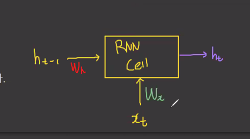

In [ ]:
import numpy as np


각 시점(순번)의 입력값인 $x_t$에 대한 벡터를 만들어야 한다.
* $x_1$에 대한 벡터
* $x_2$에 대한 벡터
* ...
* $x_t$에 대한 벡터


In [ ]:
embedding_dim = 5

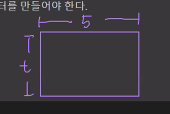

시점의 개수(t)
- 순서대로 몇 번의 순환이 일어나야 하는가?
- 10개의 데이터가 순서대로 쌓여있으면 t=10

In [ ]:
timesteps = 10

RNN cell에 위치하는 뉴런의 개수

In [ ]:
hidden_size = 8

In [ ]:
# 입력데이터 (Lookup Table)
inputs = np.random.random((timesteps, embedding_dim))
inputs

array([[0.635442  , 0.2225012 , 0.86293384, 0.51717819, 0.90646054],
       [0.03696178, 0.88326472, 0.38927245, 0.41852524, 0.02080331],
       [0.0808514 , 0.2982628 , 0.96754098, 0.55504441, 0.01884833],
       [0.07792115, 0.69345196, 0.68744865, 0.85506364, 0.00976404],
       [0.91941353, 0.71840991, 0.8766737 , 0.20263889, 0.354909  ],
       [0.14301116, 0.37340602, 0.41301197, 0.6585516 , 0.7249306 ],
       [0.67064651, 0.72237223, 0.9212388 , 0.41328777, 0.05689971],
       [0.87673496, 0.0356243 , 0.28597876, 0.41436155, 0.10408277],
       [0.14420114, 0.20713308, 0.27462494, 0.7281543 , 0.38166805],
       [0.92630545, 0.38876367, 0.75269407, 0.03074031, 0.03334799]])

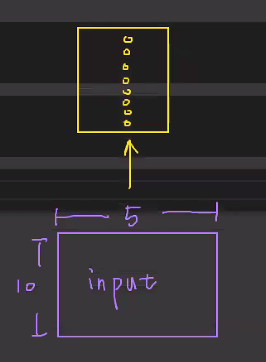

In [ ]:
# h0
hidden_state_t = np.zeros((hidden_size, ))
# 초기 은닉상태는 0이어야함. 뉴런8개니까 8개

In [ ]:
# 가중치, 편향 만들기
Wx = np.random.random((embedding_dim, hidden_size))
Wh = np.random.random((hidden_size, hidden_size))
b = np.random.random(hidden_size, )

$$
h_t = tanh(W_hh_{t-1} + W_xx_t + b)
$$

구현해보기

In [ ]:
# 시점 별 hidden_state(다음스텝으로 넘겨야할 생각!)모아보기
total_hidden_state = []

# 메모리 셀 작동( 시점의 순서대로 데이터를 입력시키기 ) = 시간펼침
for input_t in inputs: # 10x5 1줄씩 가져오깅
  output_t = np.tanh(hidden_state_t @ Wh + input_t @ Wx + b)     # Wx^T @ input_t쓰던가

  # shape
  # input_t = (5,)
  # hidden_state_t = (8,)
  # Wx = (5, 8)
  # Wh = (8,8)
  # b = (8,)

  total_hidden_state.append(list(output_t))
  print(np.shape(total_hidden_state))

  hidden_state_t = output_t

print(np.stack(total_hidden_state))


(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.76637702 0.99372192 0.99474398 0.99640433 0.99069998 0.95870525
  0.68396654 0.99237973]
 [0.99994626 0.99994158 0.9999807  0.99998388 0.99996803 0.99922935
  0.99990782 0.99996339]
 [0.99996997 0.99995845 0.99999289 0.99999696 0.99998975 0.99978365
  0.99992722 0.99998835]
 [0.99997943 0.99997862 0.99999532 0.99999706 0.9999932  0.99981998
  0.99995966 0.99999077]
 [0.99997545 0.9999873  0.99999873 0.9999983  0.99999756 0.99983963
  0.99996559 0.99999608]
 [0.99997423 0.99998136 0.99999395 0.99999818 0.99999509 0.99978184
  0.9999298  0.9999925 ]
 [0.99997682 0.99998244 0.99999811 0.99999765 0.99999602 0.99983981
  0.9999652  0.99999429]
 [0.99996697 0.9998886  0.99999011 0.99999012 0.99997323 0.99974654
  0.99986846 0.99997171]
 [0.99997182 0.99994925 0.99998712 0.99999528 0.99998505 0.99973402
  0.99989832 0.99998159]
 [0.99996577 0.99994035 0.99999576 0.99999389 0.99998883 0.99972711
  0.99993038 0.99998671]

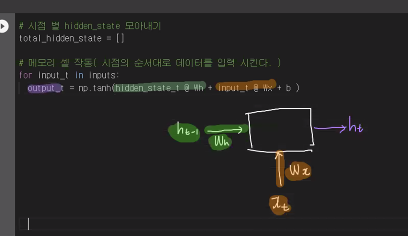

# Tensorflow로 Vanilla RNN 구현하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN # 기본 RNN 실제로는 사용하지 않는다. LSTM, GRU등을 사용

model = Sequential(
    SimpleRNN(3, # hidden_size  RNN셀에 뉴런의개수
              input_shape=(10000,10)) # timesteps = 10000, embedding_dim = 10인경우
)
# timesteps는 파라미터개수에 영향을 미치지 않음⭐⭐

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


# 왜 파라미터가 42개인가?(가중치와 편향의 개수)
- Wx = (10,3) 30개
- Wh = (3,3) 9개
- b= 편향 (3,) 3개

42개